=== 決定木分類の例 ===
分類精度: 1.000

分類レポート:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


特徴量重要度:
sepal length (cm): 0.015
sepal width (cm): 0.000
petal length (cm): 0.940
petal width (cm): 0.045


/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py

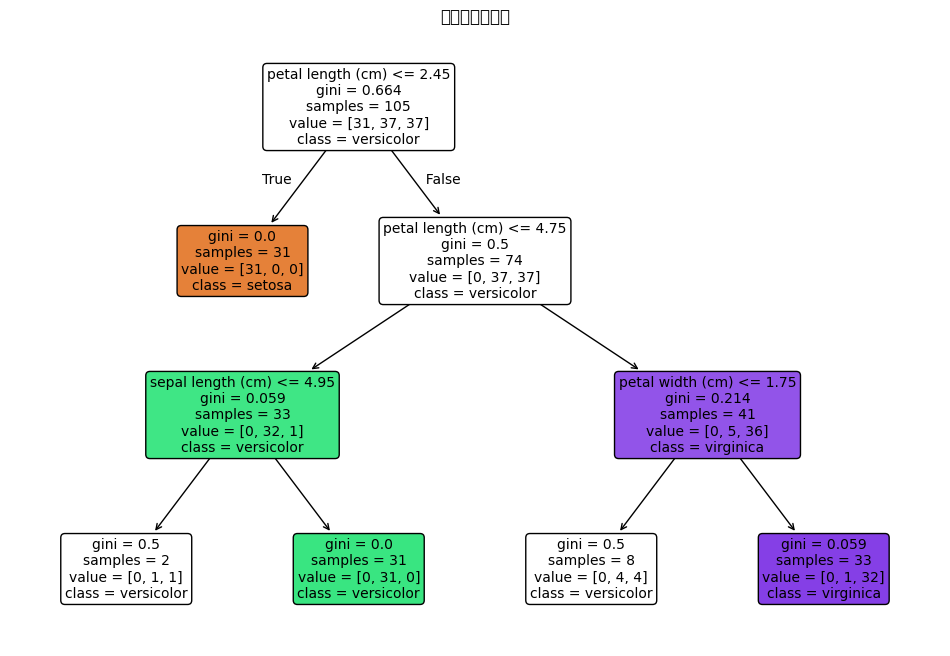


=== 決定木回帰の例 ===
平均二乗誤差 (MSE): 0.521
平均二乗平方根誤差 (RMSE): 0.722

特徴量重要度:
MedInc: 0.771
HouseAge: 0.039
AveRooms: 0.025
AveBedrms: 0.000
Population: 0.002
AveOccup: 0.153
Latitude: 0.009
Longitude: 0.001


In [4]:
# 決定木分析のサンプルコード
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
    
# ===== 1. 分類問題の例（アイリスデータセット）=====
print("=== 決定木分類の例 ===")

# データの読み込み
iris = load_iris()
X = iris.data
y = iris.target

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 決定木分類器を作成
clf = DecisionTreeClassifier(
    max_depth=3,           # 木の深さ制限
    min_samples_split=5,   # 分割に必要な最小サンプル数
    min_samples_leaf=2,    # 葉ノードの最小サンプル数
    random_state=42
)

# 訓練
clf.fit(X_train, y_train)

# 予測
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
print(f"分類精度: {accuracy:.3f}")
print("\n分類レポート:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 特徴量の重要度
feature_importance = clf.feature_importances_
feature_names = iris.feature_names
print("\n特徴量重要度:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.3f}")

# 決定木の可視化
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names,
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("決定木（分類）")
plt.show()

print("\n" + "="*50)

# ===== 2. 回帰問題の例（住宅価格データセット）=====
print("=== 決定木回帰の例 ===")

# データの読み込み（Boston住宅価格データセット）
# 注：scikit-learn 1.2以降では非推奨のため、代替データを使用
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_reg = housing.data
y_reg = housing.target

# 訓練データとテストデータに分割
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# 決定木回帰器を作成
regressor = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# 訓練
regressor.fit(X_train_reg, y_train_reg)

# 予測
y_pred_reg = regressor.predict(X_test_reg)

# 評価
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print(f"平均二乗誤差 (MSE): {mse:.3f}")
print(f"平均二乗平方根誤差 (RMSE): {rmse:.3f}")

# 特徴量の重要度
feature_importance_reg = regressor.feature_importances_
print("\n特徴量重要度:")
for name, importance in zip(housing.feature_names, feature_importance_reg):
    print(f"{name}: {importance:.3f}")


In [2]:
# アイリスデータセットの特徴量を確認
from sklearn.datasets import load_iris
iris = load_iris()
print("特徴量名:", iris.feature_names)
print("クラス名:", iris.target_names)

# 例：特徴量重要度の結果
# sepal length (cm): 0.013
# sepal width (cm):  0.000  
# petal length (cm): 0.555
# petal width (cm):  0.432

特徴量名: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
クラス名: ['setosa' 'versicolor' 'virginica']


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_5951/1751293400.py:18: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_5951/1751293400.py:18: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_5951/1751293400.py:18: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_5951/1751293400.py:18: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_5951/1751293400.py:18: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm92

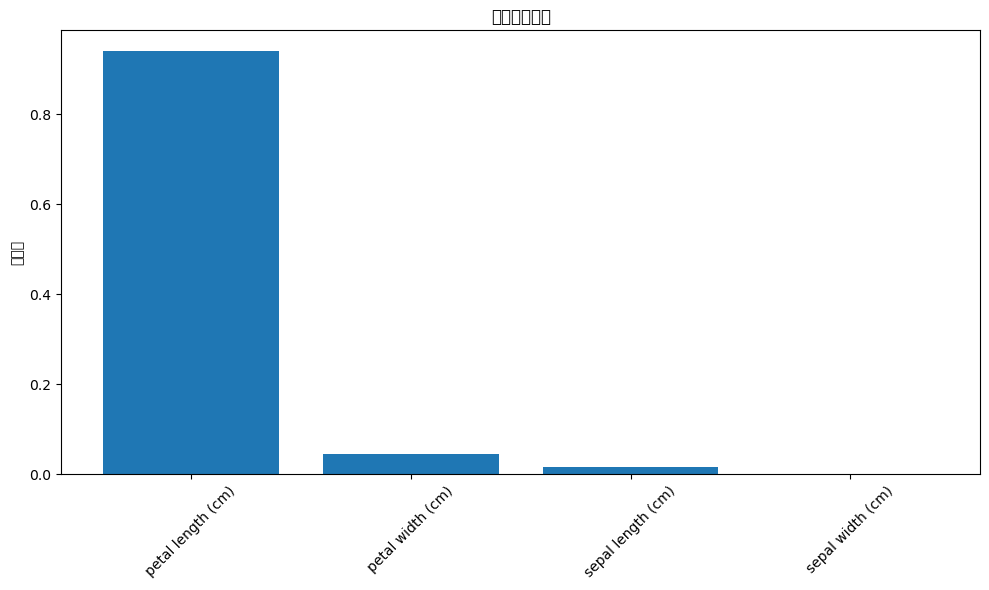

=== 特徴量重要度の解釈 ===
sepal length (cm): 0.015 (1.5%) - 重要度低
sepal width (cm): 0.000 (0.0%) - 重要度低
petal length (cm): 0.940 (94.0%) - 非常に重要
petal width (cm): 0.045 (4.5%) - 重要度低


In [3]:
# 重要度を可視化して理解しやすくする
import matplotlib.pyplot as plt

feature_names = iris.feature_names
feature_importance = clf.feature_importances_

# 重要度順にソート
sorted_idx = feature_importance.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), 
        feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), 
           [feature_names[i] for i in sorted_idx], 
           rotation=45)
plt.title('特徴量重要度')
plt.ylabel('重要度')
plt.tight_layout()
plt.show()

# 重要度の詳細表示
print("=== 特徴量重要度の解釈 ===")
for i, (name, importance) in enumerate(zip(feature_names, feature_importance)):
    percentage = importance * 100
    if importance > 0.3:
        level = "非常に重要"
    elif importance > 0.1:
        level = "重要"
    elif importance > 0.05:
        level = "やや重要"
    else:
        level = "重要度低"
    
    print(f"{name}: {importance:.3f} ({percentage:.1f}%) - {level}")


=== カスタムデータでの例 ===
サンプルデータ:
   age  income  education  purchase
0   58   32568          3         1
1   48   92592          2         1
2   34   97563          4         1
3   62   32695          1         1
4   27   78190          3         1

カスタムデータの分類精度: 0.967


/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/speed_dating/lib/python3.10/site-packages/IPython/core/pylabtools.py

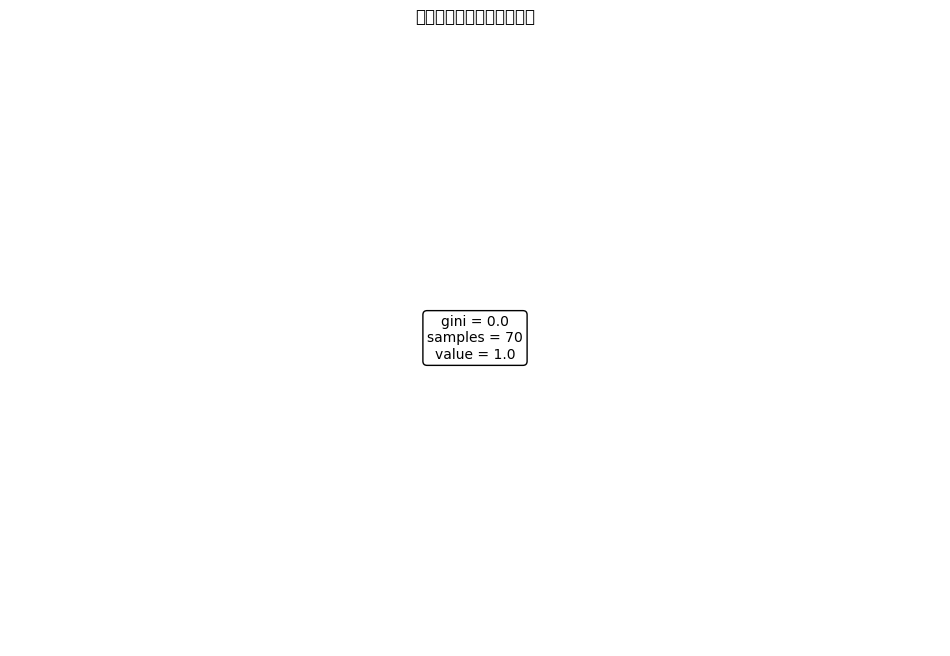


=== パラメータ調整のヒント ===
max_depth: 木の深さを制限（過学習を防ぐ）
min_samples_split: 分割に必要な最小サンプル数
min_samples_leaf: 葉ノードの最小サンプル数
criterion: 分割基準（'gini', 'entropy'など）
random_state: 再現性のための乱数シード


In [5]:

# ===== 3. カスタムデータでの例 =====
print("\n=== カスタムデータでの例 ===")

# サンプルデータの作成
np.random.seed(42)
n_samples = 100
age = np.random.randint(20, 70, n_samples)
income = np.random.randint(30000, 100000, n_samples)
education = np.random.choice([1, 2, 3, 4], n_samples)  # 1:高校, 2:専門, 3:大学, 4:大学院

# 購入確率を年齢、収入、教育レベルに基づいて設定
purchase_prob = (age/100 + income/150000 + education/10)
purchase = (purchase_prob + np.random.normal(0, 0.1, n_samples)) > 0.5

# データフレームを作成
df = pd.DataFrame({
    'age': age,
    'income': income,
    'education': education,
    'purchase': purchase.astype(int)
})

print("サンプルデータ:")
print(df.head())

# 特徴量と目的変数を分離
X_custom = df[['age', 'income', 'education']]
y_custom = df['purchase']

# 訓練・テストデータに分割
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(
    X_custom, y_custom, test_size=0.3, random_state=42
)

# 決定木分類器を作成・訓練
clf_custom = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_custom.fit(X_train_custom, y_train_custom)
    
# 予測・評価
y_pred_custom = clf_custom.predict(X_test_custom)
accuracy_custom = accuracy_score(y_test_custom, y_pred_custom)
print(f"\nカスタムデータの分類精度: {accuracy_custom:.3f}")

# 決定木の可視化
plt.figure(figsize=(12, 8))
plot_tree(clf_custom, 
          feature_names=['age', 'income', 'education'], 
          class_names=['No Purchase', 'Purchase'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("決定木（カスタムデータ）")
plt.show()

print("\n=== パラメータ調整のヒント ===")
print("max_depth: 木の深さを制限（過学習を防ぐ）")
print("min_samples_split: 分割に必要な最小サンプル数")
print("min_samples_leaf: 葉ノードの最小サンプル数")
print("criterion: 分割基準（'gini', 'entropy'など）")
print("random_state: 再現性のための乱数シード")